<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [20]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



#Pregunta 1: Distribución de tipos de contenido

/tmp/ipython-input-3107177540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type",data=df,palette="Greens")


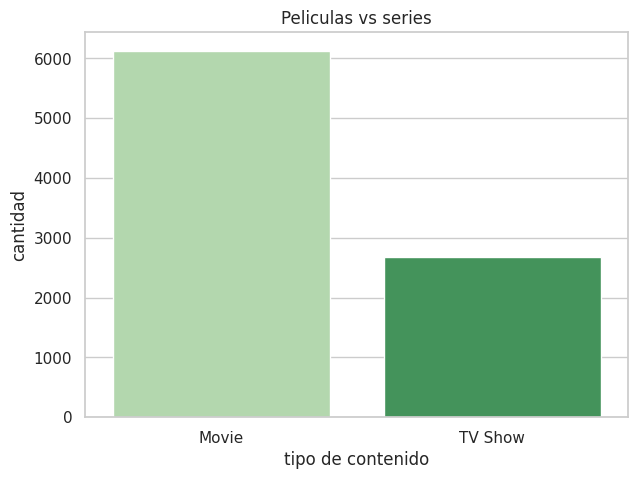

In [21]:
#Pregunta 1:
plt.figure(figsize=(7,5))
sns.countplot(x="type",data=df,palette="Greens")
plt.title("Peliculas vs series")
plt.xlabel("tipo de contenido")
plt.ylabel("cantidad")
plt.show()

**Respuesta**
De acuerdo a la distribucion de los graficos, las peliculas son lo que se consume con mayor frecuencia en netflix

#Pregunta 2: Histograma de años de lanzamiento

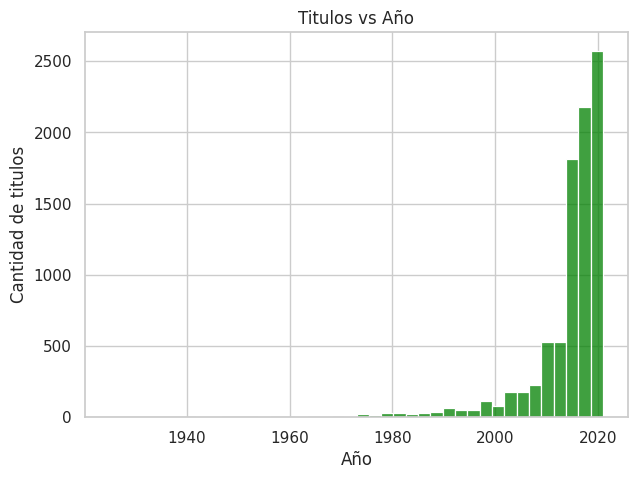

In [22]:
plt.figure(figsize=(7,5))
sns.histplot(df["release_year"],bins=40,kde=False, color="green")
plt.title("Titulos vs Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de titulos")
plt.show()

**Respuesta**
Gran parte de los titulos son desde el 2010 en adelante, y en el 2015 hubo un salto muy grande, que coincide con la popularizacion de las series y peliculas propias de netflix

#Pregunta 3:Proporción de clasificaciones por edad (rating)

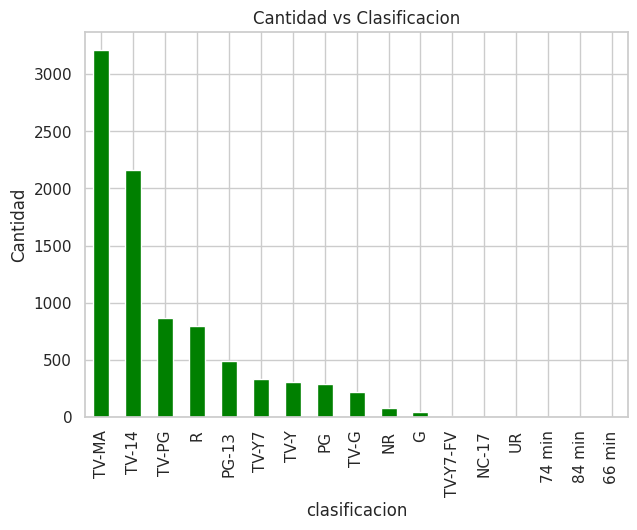

In [23]:
plt.figure(figsize=(7,5))
df["rating"].value_counts().plot(kind="bar",color="green")
plt.title("Cantidad vs Clasificacion")
plt.xlabel("clasificacion")
plt.ylabel("Cantidad")
plt.show()

**Respuesta**
La mayor cantidad de personas ven las clasificaciones TV-MA y TV-14, lo cual implicaria que el tipo de personas que consumen mayormente el conteido de Netflix son personas jovenes/adultas



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


#Pregunta 4: Número de títulos agregados por año

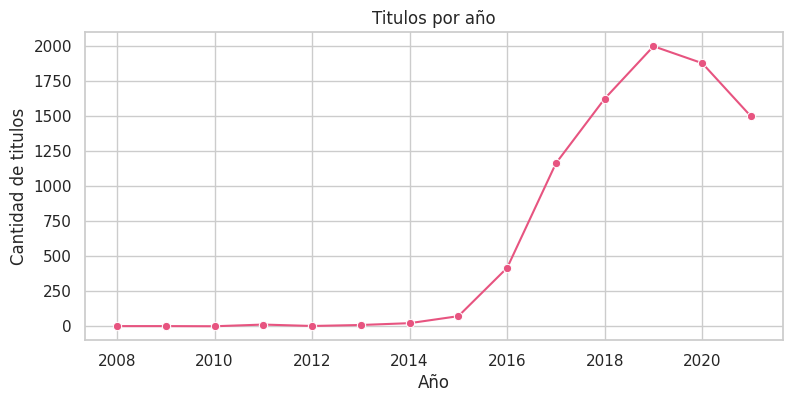

In [24]:
#antes de manejor los datos cambiaremos todas las fechas
df["date_added"]=pd.to_datetime(df["date_added"],errors="coerce")
df["month_added"]=df["date_added"].dt.month
df["year_added"]=df["date_added"].dt.year

#pregunta 4

titulos_año=df["year_added"].value_counts().sort_index()

plt.figure(figsize=(9,4))
sns.lineplot(x=titulos_año.index, y=titulos_año.values,marker="o", color="#e75480")
plt.title("Titulos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de titulos")
plt.grid(True)
plt.show()


**Respuesta**

#Pregunta 5: Heatmap de lanzamientos por año y mes

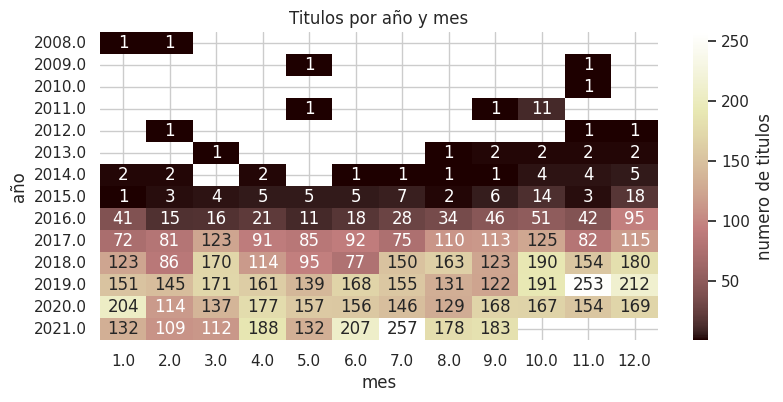

In [25]:
heatmap_data=df.pivot_table(index="year_added",columns="month_added",values="show_id",aggfunc="count")

plt.figure(figsize=(9,4))
sns.heatmap(heatmap_data,cmap="pink",annot=True,fmt=".0f",cbar_kws={"label":"numero de titulos"})
plt.title("Titulos por año y mes")
plt.xlabel("mes")
plt.ylabel("año")
plt.show()


**Respuesta**

#Pregunta 6: Duración de películas por género

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-594302306.py:2: SyntaxWarning: invalid escape sequence '\d'
  peliculas_df["duracion"]=peliculas_df["duration"].str.extract("(\d+)").astype(float)
/tmp/ipython-input-594302306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="genero", y="duracion",data=peliculas_df,palette="pink")


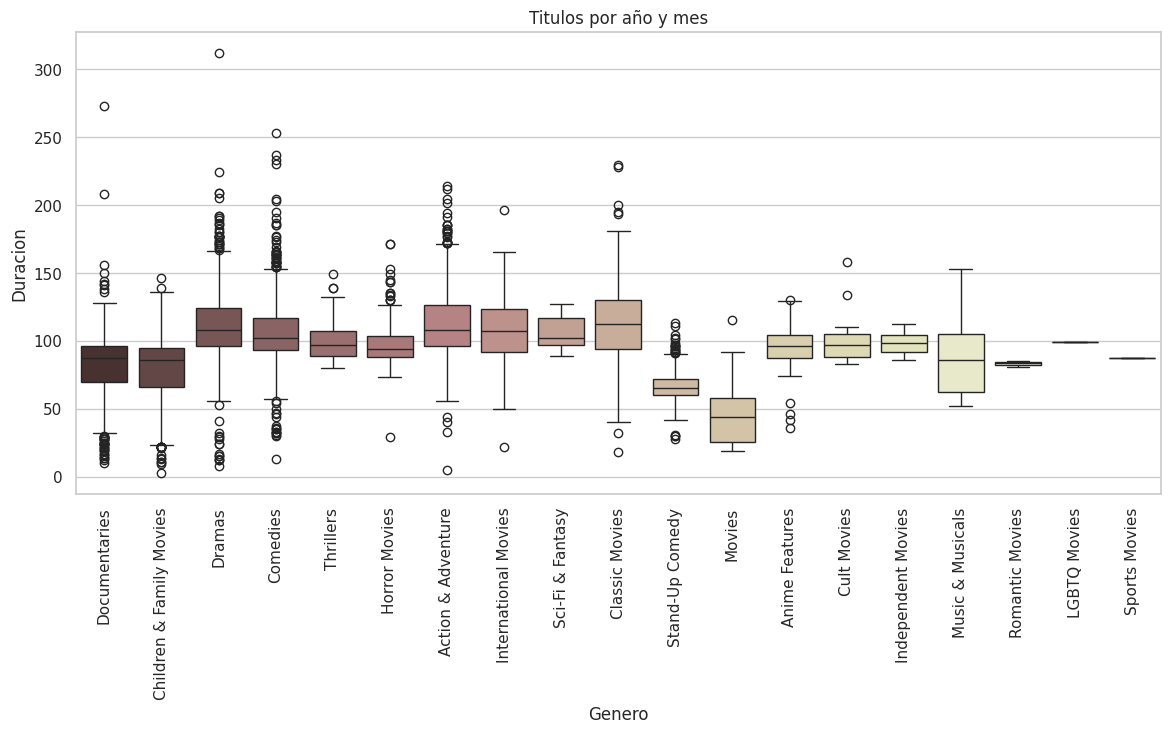

In [40]:
peliculas_df=df[df["type"]=="Movie"].copy()
peliculas_df["duracion"]=peliculas_df["duration"].str.extract("(\d+)").astype(float)
peliculas_df["genero"]=peliculas_df["listed_in"].str.split(",").str[0]
plt.figure(figsize=(14,6))
sns.boxplot(x="genero", y="duracion",data=peliculas_df,palette="pink")
plt.xticks(rotation=90)
plt.title("Titulos por año y mes")
plt.xlabel("Genero")
plt.ylabel("Duracion")
plt.show()


**Respuesta**



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



#Pregunta 7: Top 10 países con más producciones

/tmp/ipython-input-1020020312.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.values, y=top_paises.index, palette="Greens")


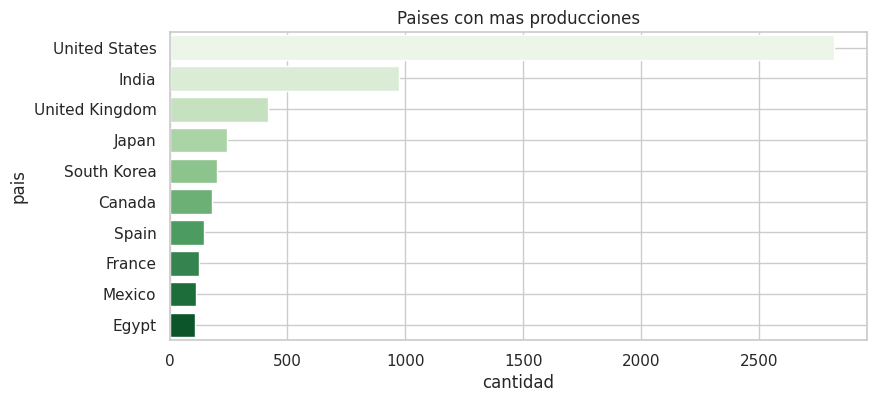

In [37]:
#primero hacer el top10
top_paises=df["country"].value_counts().head(10)

#y ahora, el grafico:

plt.figure(figsize=(9,4))
sns.barplot(x=top_paises.values, y=top_paises.index, palette="Greens")
plt.title("Paises con mas producciones")
plt.xlabel("cantidad")
plt.ylabel("pais")
plt.grid(True)
plt.show()



**Respuesta**
Primero esta Estados Unidos, luego India y el Reino Unido  

# Pregunta 8: Películas vs Series según género

<Figure size 1200x600 with 0 Axes>

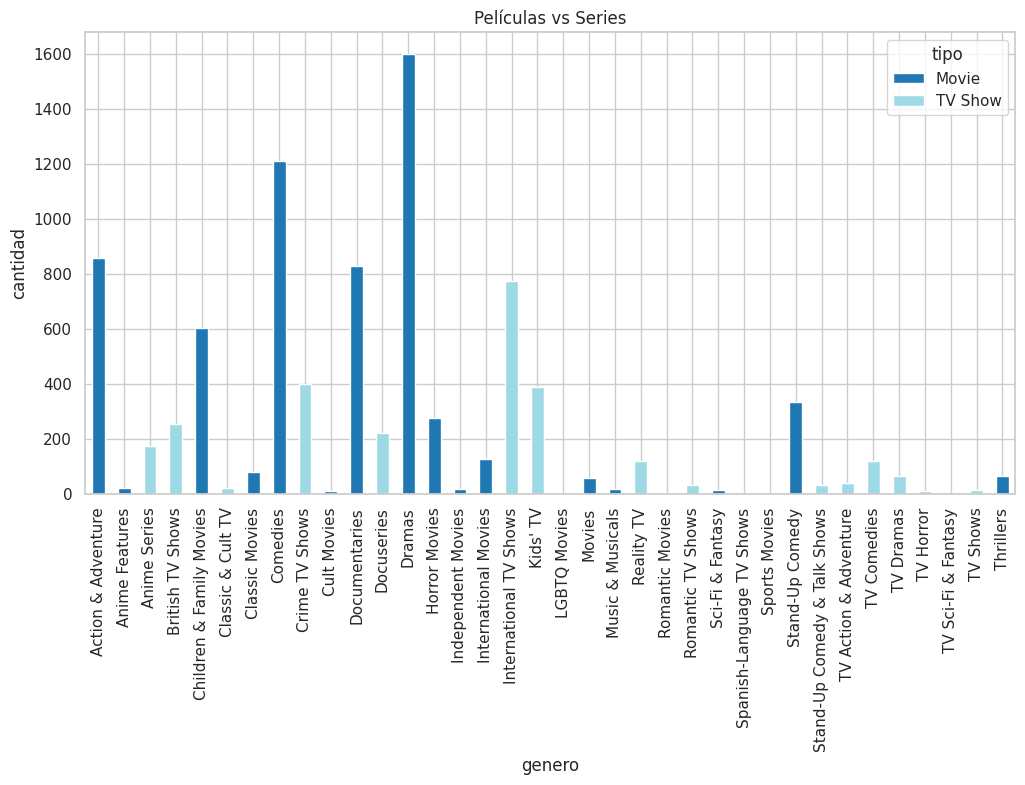

In [50]:
#obtener los generos principales de peliculas y series
df["genero"]= df["listed_in"].str.split(",").str[0]

#agrupar por genero y tipo (pelicula o serie)
cuenta= df.groupby(["genero","type"]).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
cuenta.plot(kind="bar",stacked=True, colormap="tab20",figsize=(12,6))
plt.title("Películas vs Series")
plt.xlabel("genero")
plt.ylabel("cantidad")
plt.legend(title="tipo")
plt.show()

#y ahora si pasamos al grafico


**Respuesta**

#Pregunta 9: Relación entre duración y año de lanzamiento

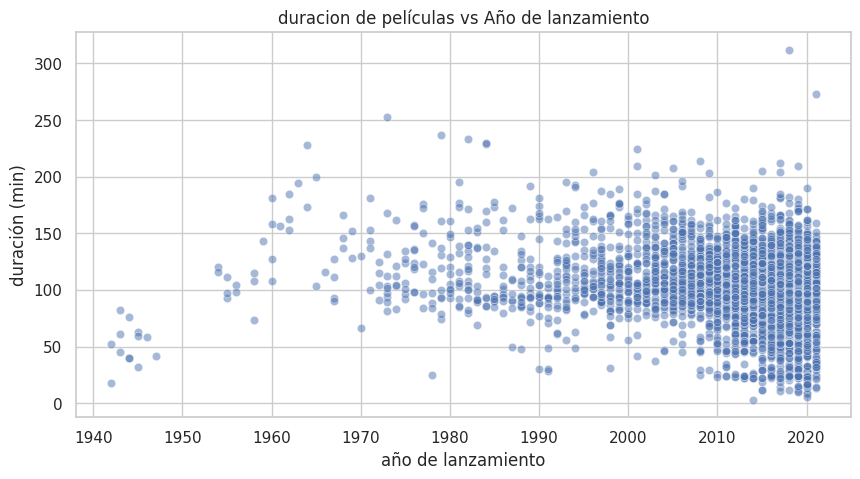

In [51]:
#debido a que ya tenemos la duracion de las peliculas en peliculas_df

plt.figure(figsize=(10,5))
sns.scatterplot(data=peliculas_df, x="release_year", y="duracion", alpha=0.5)
plt.title("duracion de películas vs Año de lanzamiento")
plt.xlabel("año de lanzamiento")
plt.ylabel("duración (min)")
plt.show()

**Respuesta** La mayor parte de las peliculas se encuentran entre los 100 y 150 minutos y a lo largo de las años de lanzamiento no ha cambiado demasiado esta tendencia

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

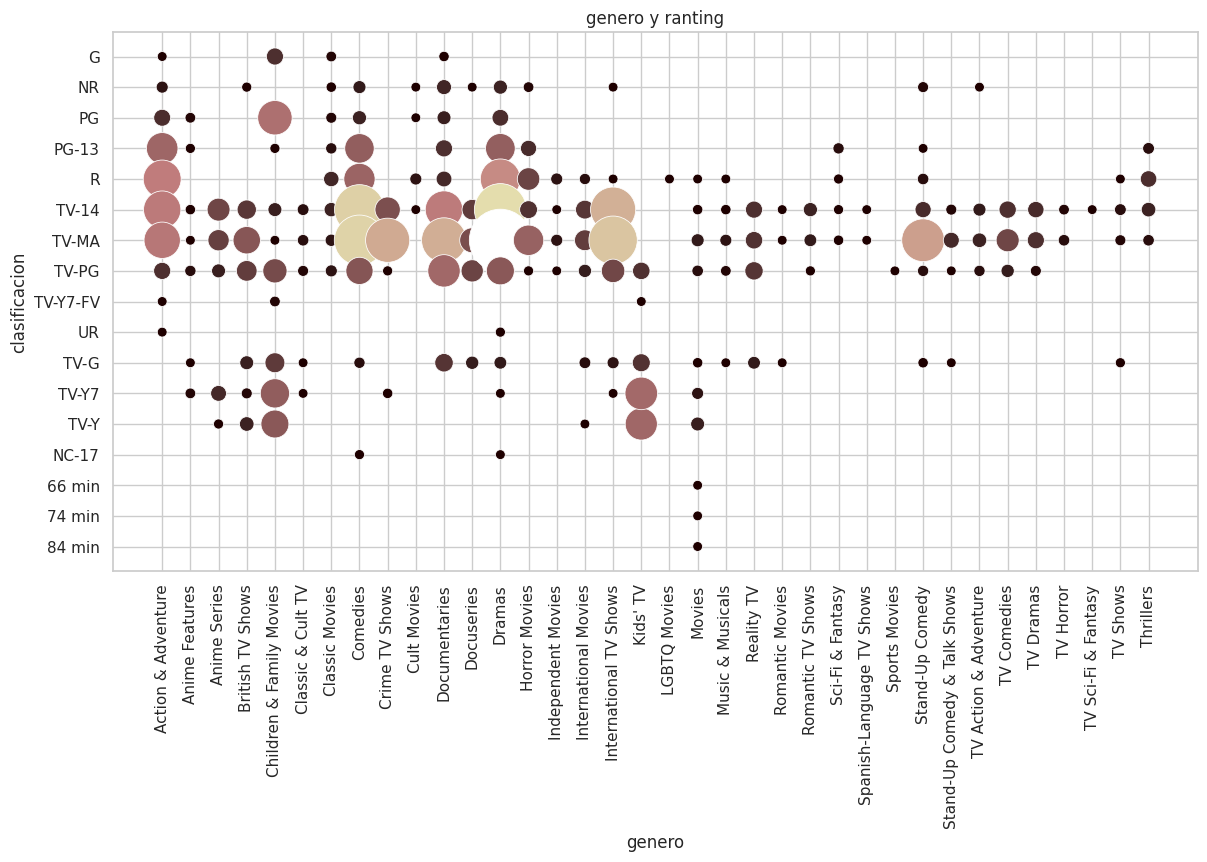

In [54]:
#ya tenemos los generos principales separados, asi que evaluamos la frecuencia
df["genero"] = df["listed_in"].str.split(",").str[0]
frec=df.groupby(["genero","rating"]).size().reset_index(name="count")
#dar los valores
plt.figure(figsize=(14,7))
sns.scatterplot(data=frec,x="genero",y="rating",size="count",sizes=(50,2000),hue="count",palette="pink", legend=False)
#Y ahora el dibujo del grafico
plt.xticks(rotation=90)
plt.title("genero y ranting")
plt.xlabel("genero")
plt.ylabel("clasificacion")
plt.show()

**Respuesta**
los generos mas dirigidos al publico adulto son R,NC-17, TV-MA. Y aquellos que son mas dirigidos a un publico familiar o infantil son: PG, PG-13, TV-Y